Данный скрипт отображает некую статистику результирующих данных

In [72]:
import numpy as np
import scipy.stats as st
import csv
import matplotlib.pyplot as plt

In [73]:
name_file = ["matrix_res_500.csv", "matrix_res_1000.csv", "matrix_res_1500.csv"]
name_time = "matrix_time.csv"
list_number = [500, 1000, 1500]
confidence_level = 0.95  # уровень доверия

In [74]:
list_time = []
with open(name_time) as file: 
    reader = csv.reader(file)
    for row in reader: 
        list_time.append(row)
print(list_time)

[['113', '536', '435', '394', '435', '393', '395', '395', '392', '402'], ['3966', '6746', '4712', '4548', '4272', '3990', '4074', '5323', '4436', '3987'], ['16579', '15535', '13118', '12850', '14412', '12637', '14246', '23057', '17049', '12881']]


In [75]:
times = []
for i in list_time:
    times.append([int(item) for item in i])
dic_time = {}
dic_time[500] = times[0]
dic_time[1000] = times[1]
dic_time[1500] = times[2]
print(dic_time)

{500: [113, 536, 435, 394, 435, 393, 395, 395, 392, 402], 1000: [3966, 6746, 4712, 4548, 4272, 3990, 4074, 5323, 4436, 3987], 1500: [16579, 15535, 13118, 12850, 14412, 12637, 14246, 23057, 17049, 12881]}


In [76]:
list_mean = []
for i in dic_time.keys():
    sample = dic_time[i]
    median_value = np.median(sample)
    mean = np.mean(sample)
    list_mean.append(mean)
    var_v = np.var(sample)  
    std_dev = np.std(sample)  
    n = len(sample) 

    # Рассчет стандартной ошибки
    se = std_dev / var_v
    # Рассчет критического значения
    z = st.t.ppf((1 + confidence_level) / 2, n - 1)
    # Рассчет доверительного интервала
    lower_bound = mean - z * se
    upper_bound = mean + z * se

    min_v = np.min(sample)
    max_v = np.max(sample)
    print(f"         Результаты статистики для выбоки времени для матрицы размера {i} x {i}")
    print("Дисперсия:", var_v)
    print("Стандартное отклонение:", std_dev)
    print("Минимальное значение:", min_v)
    print("Максимальное значение:", max_v)
    print("Среднее значение: ", mean)
    print("Медиана:", median_value)
    print("Доверительный интервал: ({}, {})".format(lower_bound, upper_bound))
    print()

         Результаты статистики для выбоки времени для матрицы размера 500 x 500
Дисперсия: 10230.8
Стандартное отклонение: 101.14741716919913
Минимальное значение: 113
Максимальное значение: 536
Среднее значение:  389.0
Медиана: 395.0
Доверительный интервал: (388.97763504767545, 389.02236495232455)

         Результаты статистики для выбоки времени для матрицы размера 1000 x 1000
Дисперсия: 670398.24
Стандартное отклонение: 818.7785048473122
Минимальное значение: 3966
Максимальное значение: 6746
Среднее значение:  4605.4
Медиана: 4354.0
Доверительный интервал: (4605.397237156142, 4605.402762843857)

         Результаты статистики для выбоки времени для матрицы размера 1500 x 1500
Дисперсия: 9048688.04
Стандартное отклонение: 3008.1037282647017
Минимальное значение: 12637
Максимальное значение: 23057
Среднее значение:  15236.4
Медиана: 14329.0
Доверительный интервал: (15236.399247979003, 15236.400752020996)



Text(0.5, 1.0, 'Гистограмма выборки времени для матрицы размера 500 x 500')

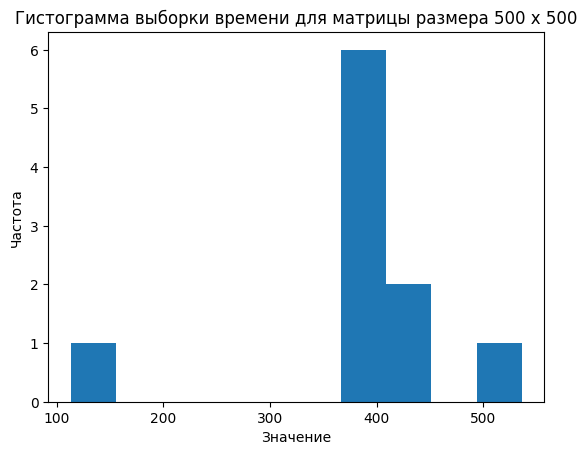

In [77]:
plt.hist(dic_time[500], bins=10)
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.title("Гистограмма выборки времени для матрицы размера 500 x 500")

Text(0.5, 1.0, 'Гистограмма выборки времени для матрицы размера 1000 x 1000')

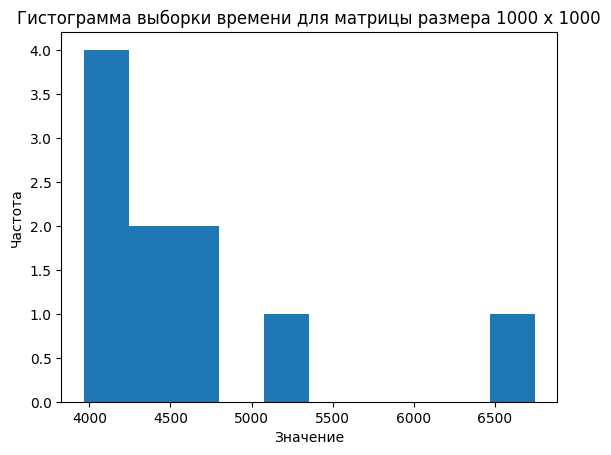

In [78]:
plt.hist(dic_time[1000], bins=10)
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.title("Гистограмма выборки времени для матрицы размера 1000 x 1000")

Text(0.5, 1.0, 'Гистограмма выборки времени для матрицы размера 1500 x 1500')

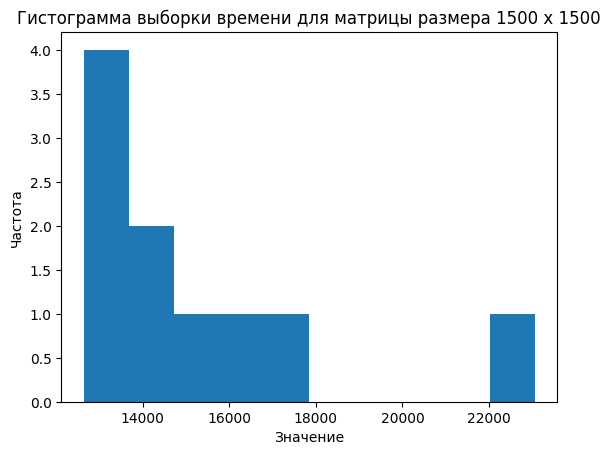

In [79]:
plt.hist(dic_time[1500], bins=10)
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.title("Гистограмма выборки времени для матрицы размера 1500 x 1500")

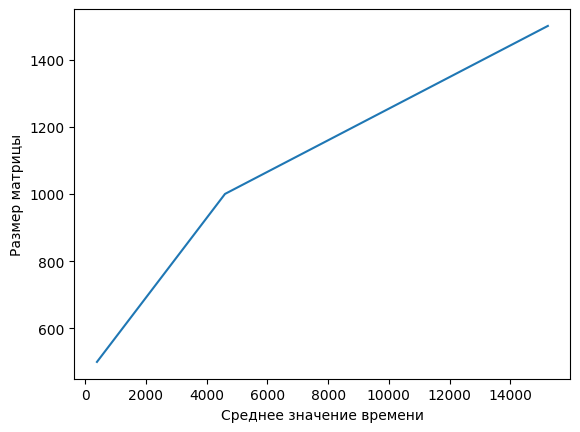

In [80]:
#создание графика зависимости времени реализации произведения квадратных матриц при разных размерах матрицы
#в данном случае размера 500, 1000, 1500
plt.plot(list_mean, list_number)
plt.xlabel('Среднее значение времени')
plt.ylabel('Размер матрицы')
plt.show()

В результате статистического анализа можно сделать вывод, что в выборках времени для каждого размера матриц возникали значения сильно отличающиеся от среднего